# やりたいこと

- 必要なライブラリと準備
- OpenFOAMのデータの取得（○○mの速度分布）
- 理論計算の記述
- OpenFOAMと理論計算の比較（○○mの速度分布）
- 以上をまとめてスクリプト化して実行する

# 必要なライブラリと準備

必要なライブラリをインポート

In [1]:
import re
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os, shutil
from pathlib import Path

フォルダ内に複数のファイルがある場合に以下の関数を使って昇順に並び替えてリスト化する

In [2]:
# 文字列を含む要素を数字で昇順にする関数
def atoi(text):
    print(text)
    return int(text) if text.isdigit() else text

def natural_keys(text):
    return [ atoi(c) for c in re.split(r'(\d+)^', text) ]

# 数字であるかどうかの判定
def is_int(s):
    try:
        int(s)
        return True
    except ValueError:
        return False

# OpenFOAMのデータの取得（○○mの速度分布）

In [3]:
resultDir = Path("../postProcessing/sampleDict")  # 計算フォルダ
latestTime = sorted([a for a in os.listdir(resultDir) if is_int(a)], key=float)[-1] # latestTimeを抜き出す
sampleDictdata = resultDir/ latestTime

sampleDictdata

PosixPath('../postProcessing/sampleDict/8000')

In [4]:
# ファイル名を数字部分と非数字部分に分割するための正規表現パターン
pattern = r'(\d*\.\d+|\d+)'
# 数字部分だけを抜き出して、数値に変換してソートする
caseList = sorted(os.listdir(sampleDictdata), key=lambda f: [float(d) if d.isdigit() else d for d in re.split(pattern, f)])

for i, zCase in enumerate(caseList):
    print(zCase)

z_0.001m_U.xy
z_0.05m_U.xy
z_0.1m_U.xy
z_0.15m_U.xy


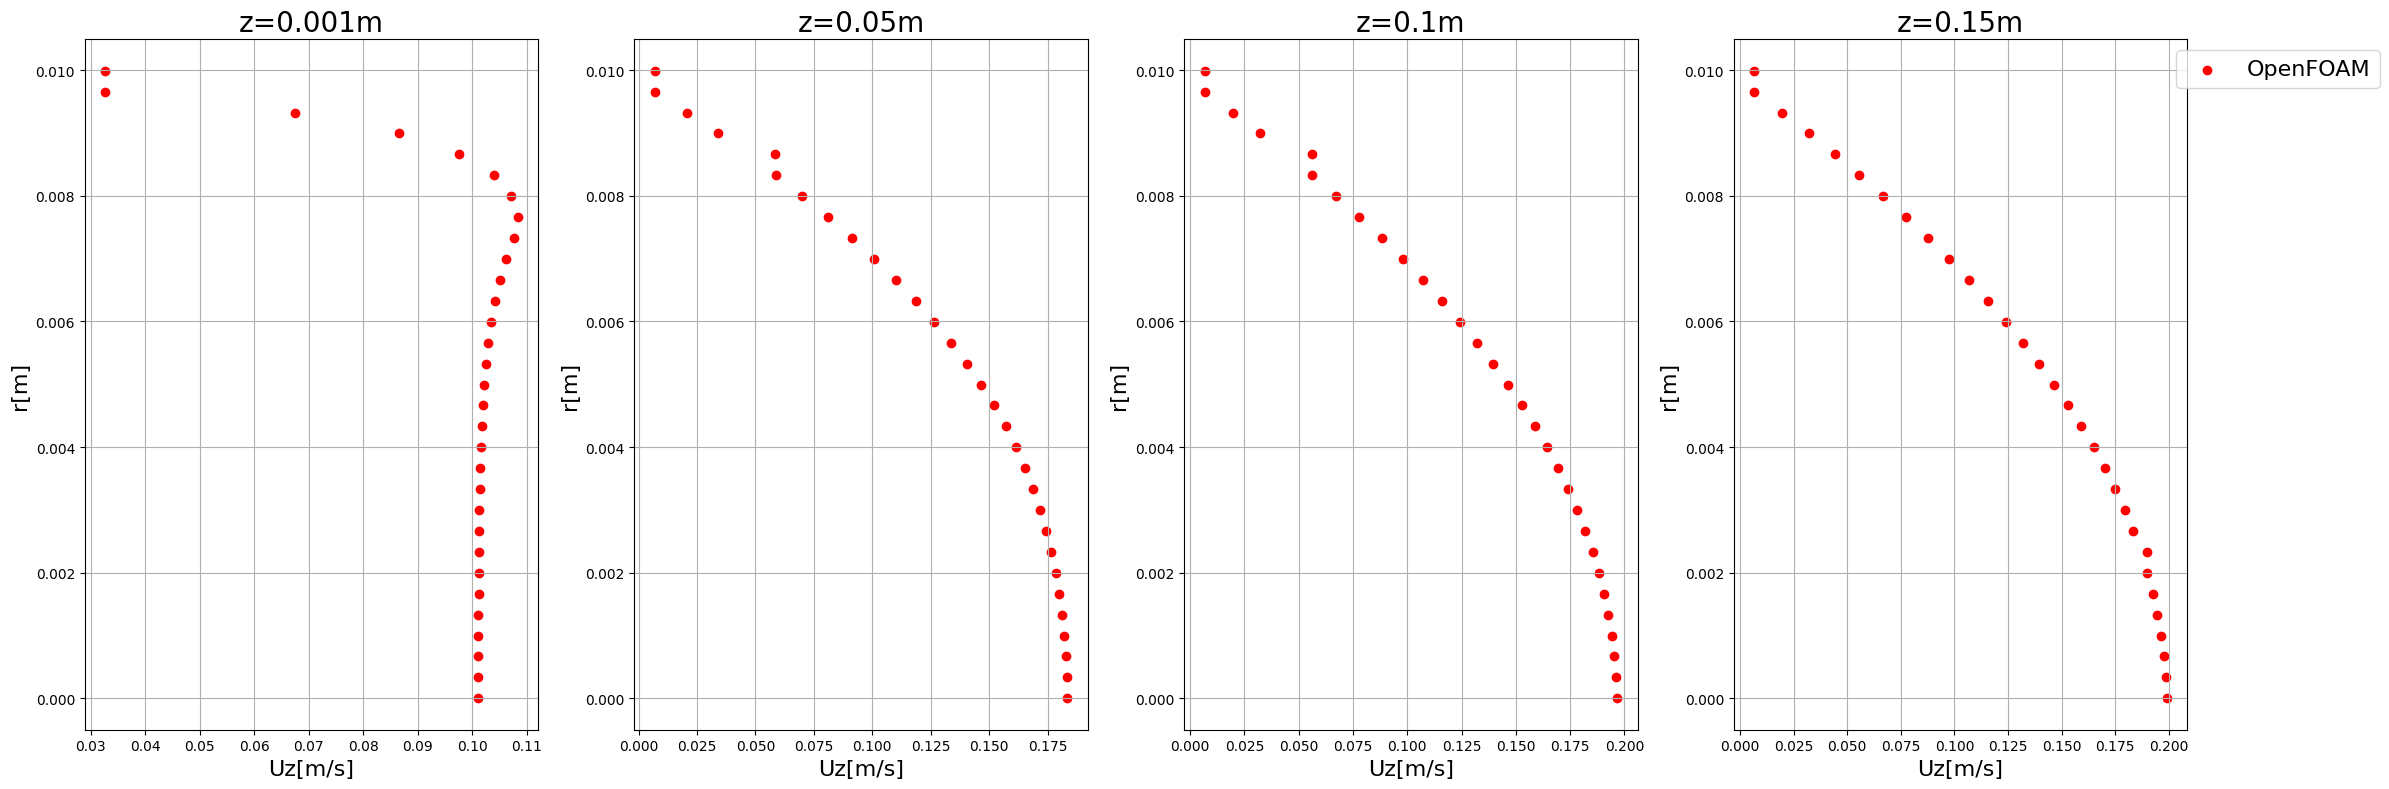

In [5]:
# グラフのセット    
fig, axes = plt.subplots(1, 4, figsize=(24,8), tight_layout=True)

for i, zCase in enumerate(caseList):

    # OpenFOAMのデータをデータフレームで取得
    df_data = pd.read_table(sampleDictdata/zCase, index_col=False, names=('x[m]', 'y[m]', 'z[m]', 'Uz[m/s]'))
    # 横軸：流速、縦軸：動径方向でプロット
    axes[i].scatter(df_data["Uz[m/s]"], df_data["x[m]"], color="red", label="OpenFOAM")

    # ラベルの設定
    axes[i].set_ylabel("r[m]", fontsize=16)
    axes[i].set_xlabel("Uz[m/s]", fontsize=16)
    if i>=3: plt.legend(loc="upper center",bbox_to_anchor=(1.2, 1.0), fontsize=16)
    axes[i].grid("-")
    axes[i].set_title(f"z={zCase.split('_')[1]}", fontsize=20)

OpenFOAMのデータを取得してプロットできた

# 理論計算の記述

理論式は以下の式で記述できる
$$u(r) = 2\bar{u}\bigg(1-\big(\frac{r}{R}\big)^2\bigg)$$

In [6]:
Radius = 10/1000 # 半径 10mm = 0.01m
ub = 0.1       # 断面平均速度(流入速度0.1m/s)
y = np.arange(0,Radius,0.01/1000)
uy = 2*ub*(1-(y/Radius)**2)

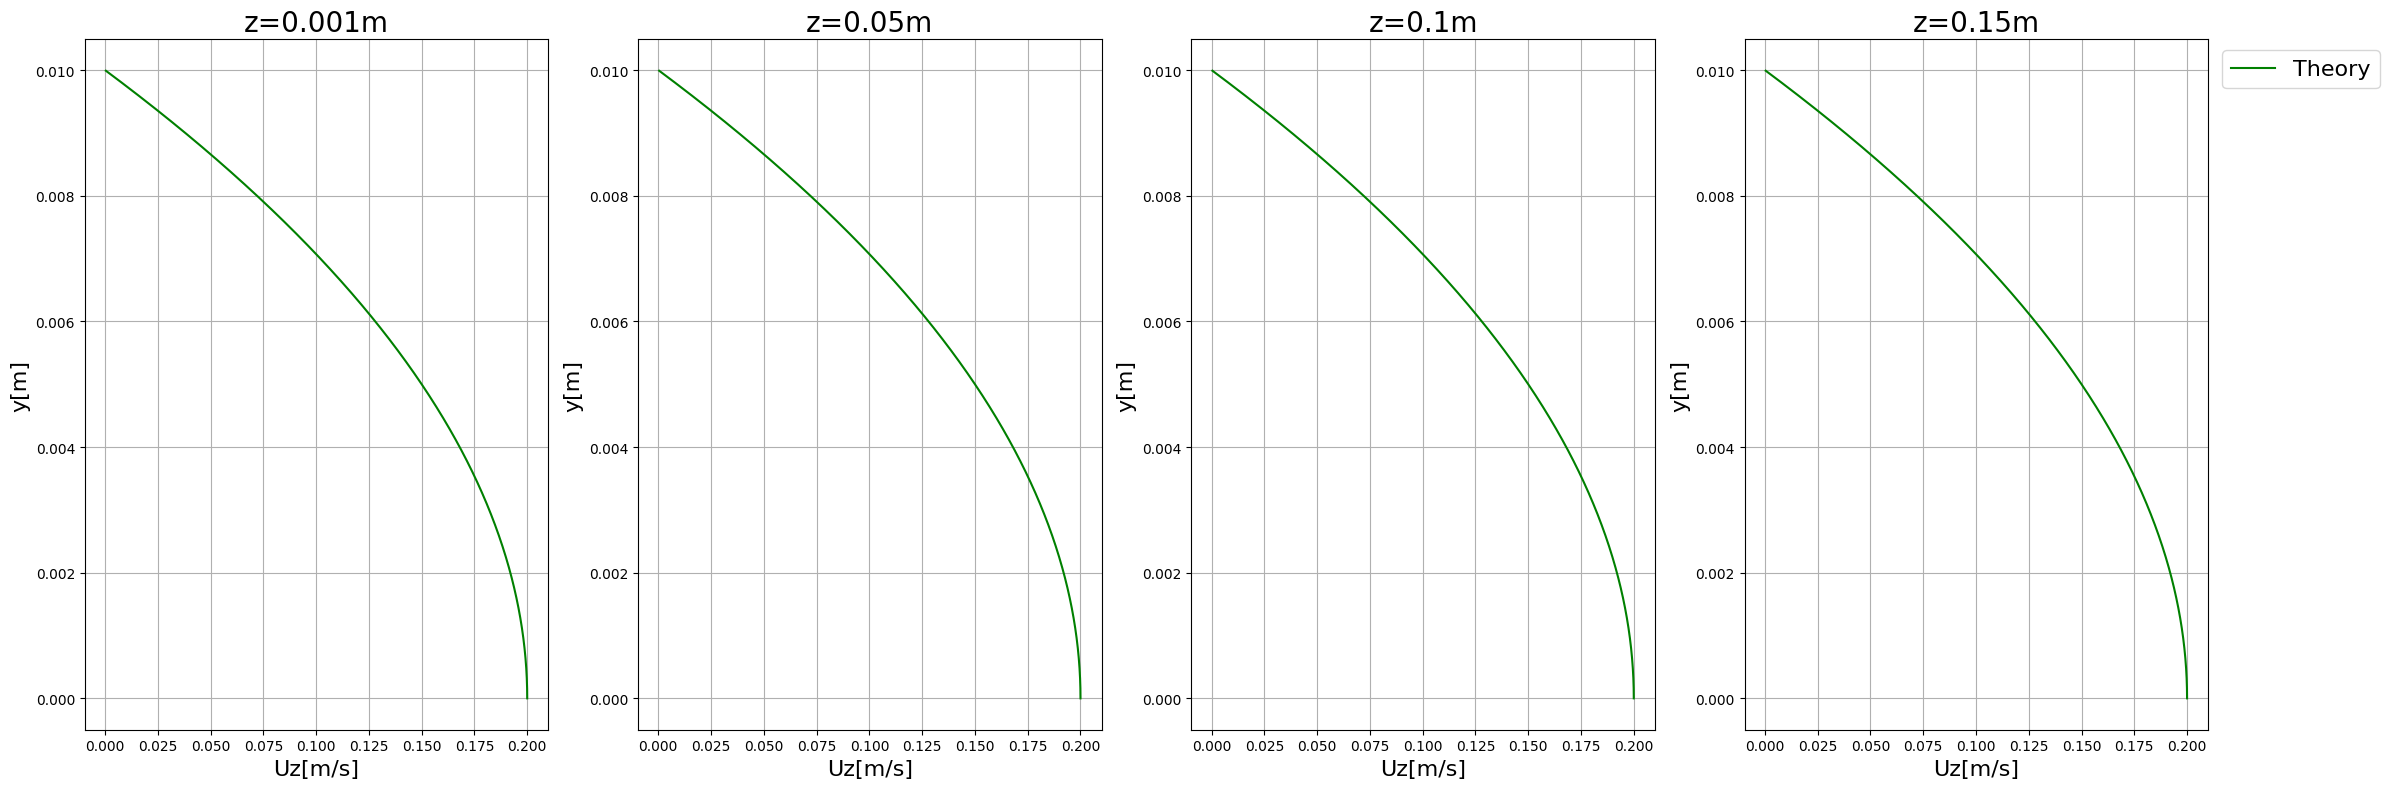

In [7]:
# グラフのセット    
fig, axes = plt.subplots(1, 4, figsize=(24,8), tight_layout=True)

for i, zCase in enumerate(caseList):

    # 理論式のプロット
    axes[i].plot(uy, y, color="green", label="Theory")
    axes[i].set_ylabel("y[m]", fontsize=16)
    axes[i].set_xlabel("Uz[m/s]", fontsize=16)
    if i>=3: plt.legend(loc="upper center",bbox_to_anchor=(1.2, 1.0), fontsize=16)
    axes[i].grid("-")
    axes[i].set_title(f"z={zCase.split('_')[1]}", fontsize=20)

# OpenFOAMと理論計算の比較（○○mの速度分布）

先程グラフ化したOpenFOAMの結果と理論式とを重ねてグラフ化する

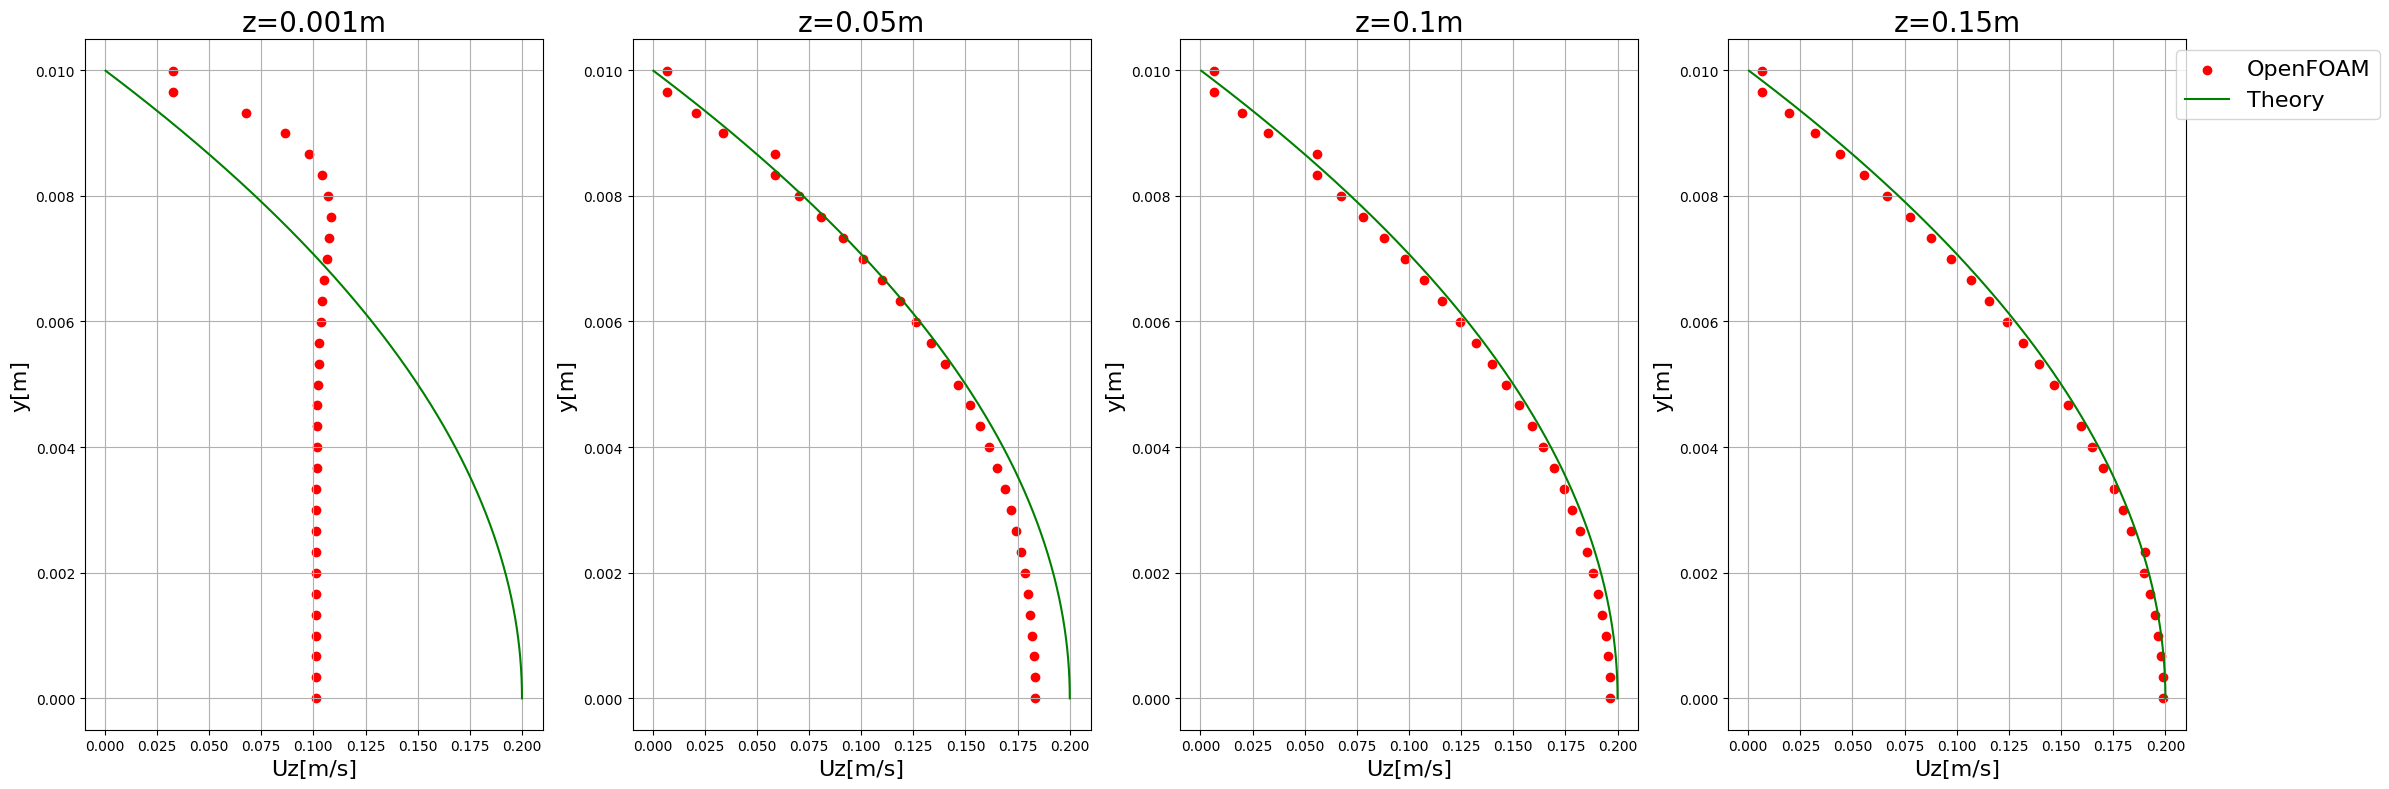

In [8]:
# グラフのセット    
fig, axes = plt.subplots(1, 4, figsize=(24,8), tight_layout=True)

for i, zCase in enumerate(caseList):

    # OpenFOAMのデータをデータフレームで取得
    df_data = pd.read_table(sampleDictdata/zCase, index_col=False, names=('x[m]', 'y[m]', 'z[m]', 'Uz[m/s]'))
    # 横軸：流速、縦軸：動径方向でプロット
    axes[i].scatter(df_data["Uz[m/s]"], df_data["x[m]"], color="red", label="OpenFOAM")
    
    # 理論式のプロット
    axes[i].plot(uy, y, color="green", label="Theory")
    
    axes[i].set_ylabel("y[m]", fontsize=16)
    axes[i].set_xlabel("Uz[m/s]", fontsize=16)
    if i>=3: plt.legend(loc="upper center",bbox_to_anchor=(1.2, 1.0), fontsize=16)
    axes[i].grid("-")
    axes[i].set_title(f"z={zCase.split('_')[1]}", fontsize=20)

# 以上をまとめてスクリプト化して実行する

terminalで「100_cylinderAxialSymmetry/001_laminar_U0.1/python_plot」へ移動する。

※以下は絶対パスで記述している
<div style="background-color: black; color: white; padding: 10px; border-radius: 5px; font-family: monospace;">
cd /home/dexcs/Desktop/run/100_cylinderAxialSymmetry/001_laminar_U0.1/python_plot
</div>

```bash
.
├── plot.ipynb
├── plot.png
└── plot.py
```

plot.pyには以下のようにスクリプト化している

```python
import re
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os, shutil
from pathlib import Path

# 文字列を含む要素を数字で昇順にする関数
def atoi(text):
    print(text)
    return int(text) if text.isdigit() else text

def natural_keys(text):
    return [ atoi(c) for c in re.split(r'(\d+)^', text) ]

# 数字であるかどうかの判定
def is_int(s):
    try:
        int(s)
        return True
    except ValueError:
        return False

# ファイル名を数字部分と非数字部分に分割するための正規表現パターン
pattern = r'(\d*\.\d+|\d+)'
resultDir = Path("../postProcessing/sampleDict")  # 計算フォルダ
latestTime = sorted([a for a in os.listdir(resultDir) if is_int(a)], key=float)[-1] # latestTimeを抜き出す
sampleDictdata = resultDir/ latestTime
# 数字部分だけを抜き出して、数値に変換してソートする
caseList = sorted(os.listdir(sampleDictdata), key=lambda f: [float(d) if d.isdigit() else d for d in re.split(pattern, f)])


# 理論式
Radius = 10/1000 # 半径 10mm = 0.01m
ub = 0.1       # 断面平均速度(流入速度0.1m/s)
y = np.arange(0,Radius,0.01/1000)
uy = 2*ub*(1-(y/Radius)**2)

# グラフのセット    
fig, axes = plt.subplots(1, 4, figsize=(24,8), tight_layout=True)

for i, zCase in enumerate(caseList):

    # OpenFOAMのデータをデータフレームで取得
    df_data = pd.read_table(sampleDictdata/zCase, index_col=False, names=('x[m]', 'y[m]', 'z[m]', 'Uz[m/s]'))
    # 横軸：流速、縦軸：動径方向でプロット
    axes[i].scatter(df_data["Uz[m/s]"], df_data["x[m]"], color="red", label="OpenFOAM")
    
    # 理論式のプロット
    axes[i].plot(uy, y, color="green", label="Theory")
    
    axes[i].set_ylabel("y[m]", fontsize=16)
    axes[i].set_xlabel("Uz[m/s]", fontsize=16)
    if i>=3: plt.legend(loc="upper center",bbox_to_anchor=(1.2, 1.0), fontsize=16)
    axes[i].grid("-")
    axes[i].set_title(f"z={zCase.split('_')[1]}", fontsize=20)

plt.savefig("plot.png")

```

以下のコマンドでpythonを実行

<div style="background-color: black; color: white; padding: 10px; border-radius: 5px; font-family: monospace;">
python3   plot.py
</div>

plot.pngにグラフが出力

<img src="plot.png">